In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Wholesale customers dataset
#df = pd.read_csv("../data/Wholesale customers data.csv")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
wholesale_customers_df = pd.read_csv(url)

In [9]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", wholesale_customers_df.shape)

Dimensions of the dataset: (440, 8)


In [11]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:\n")
wholesale_customers_df.head()


First few rows of the dataset:



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
# Check for missing values
print("\nMissing values in the dataset:\n")
wholesale_customers_df.isnull().sum()


Missing values in the dataset:



Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

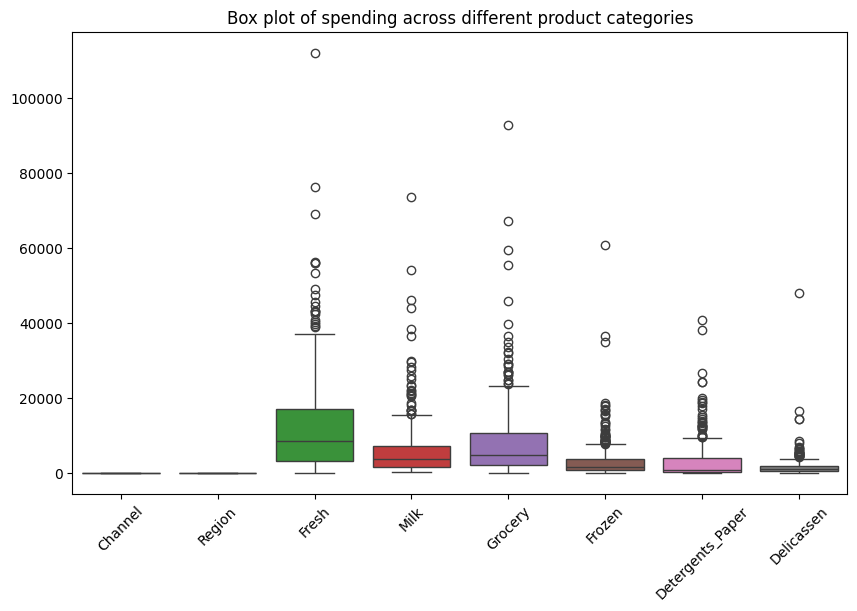

In [14]:
# Check for outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=wholesale_customers_df)
plt.title("Box plot of spending across different product categories")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Normalize the data using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
wholesale_customers_scaled = scaler.fit_transform(wholesale_customers_df)


In [17]:
# Convert the scaled data back to a DataFrame
wholesale_customers_scaled_df = pd.DataFrame(wholesale_customers_scaled, columns=wholesale_customers_df.columns)

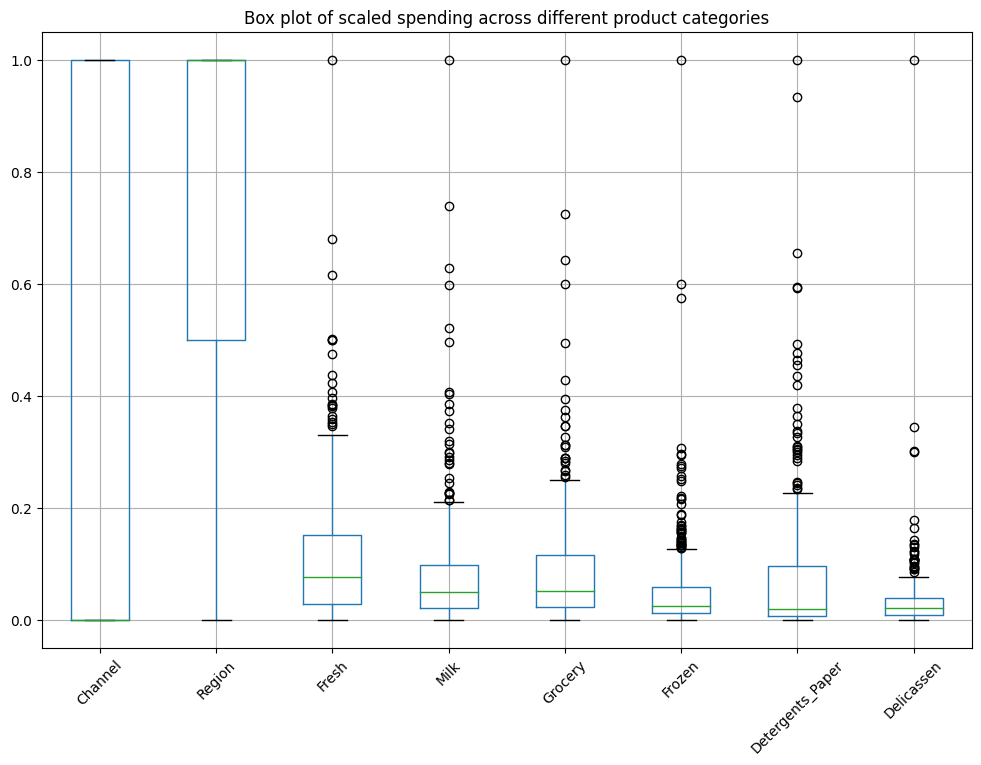

In [19]:
# Exploratory data analysis
# Analyze the distributions of spending across different product categories
plt.figure(figsize=(12, 8))
wholesale_customers_scaled_df.boxplot()
plt.title("Box plot of scaled spending across different product categories")
plt.xticks(rotation=45)
plt.show()

C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


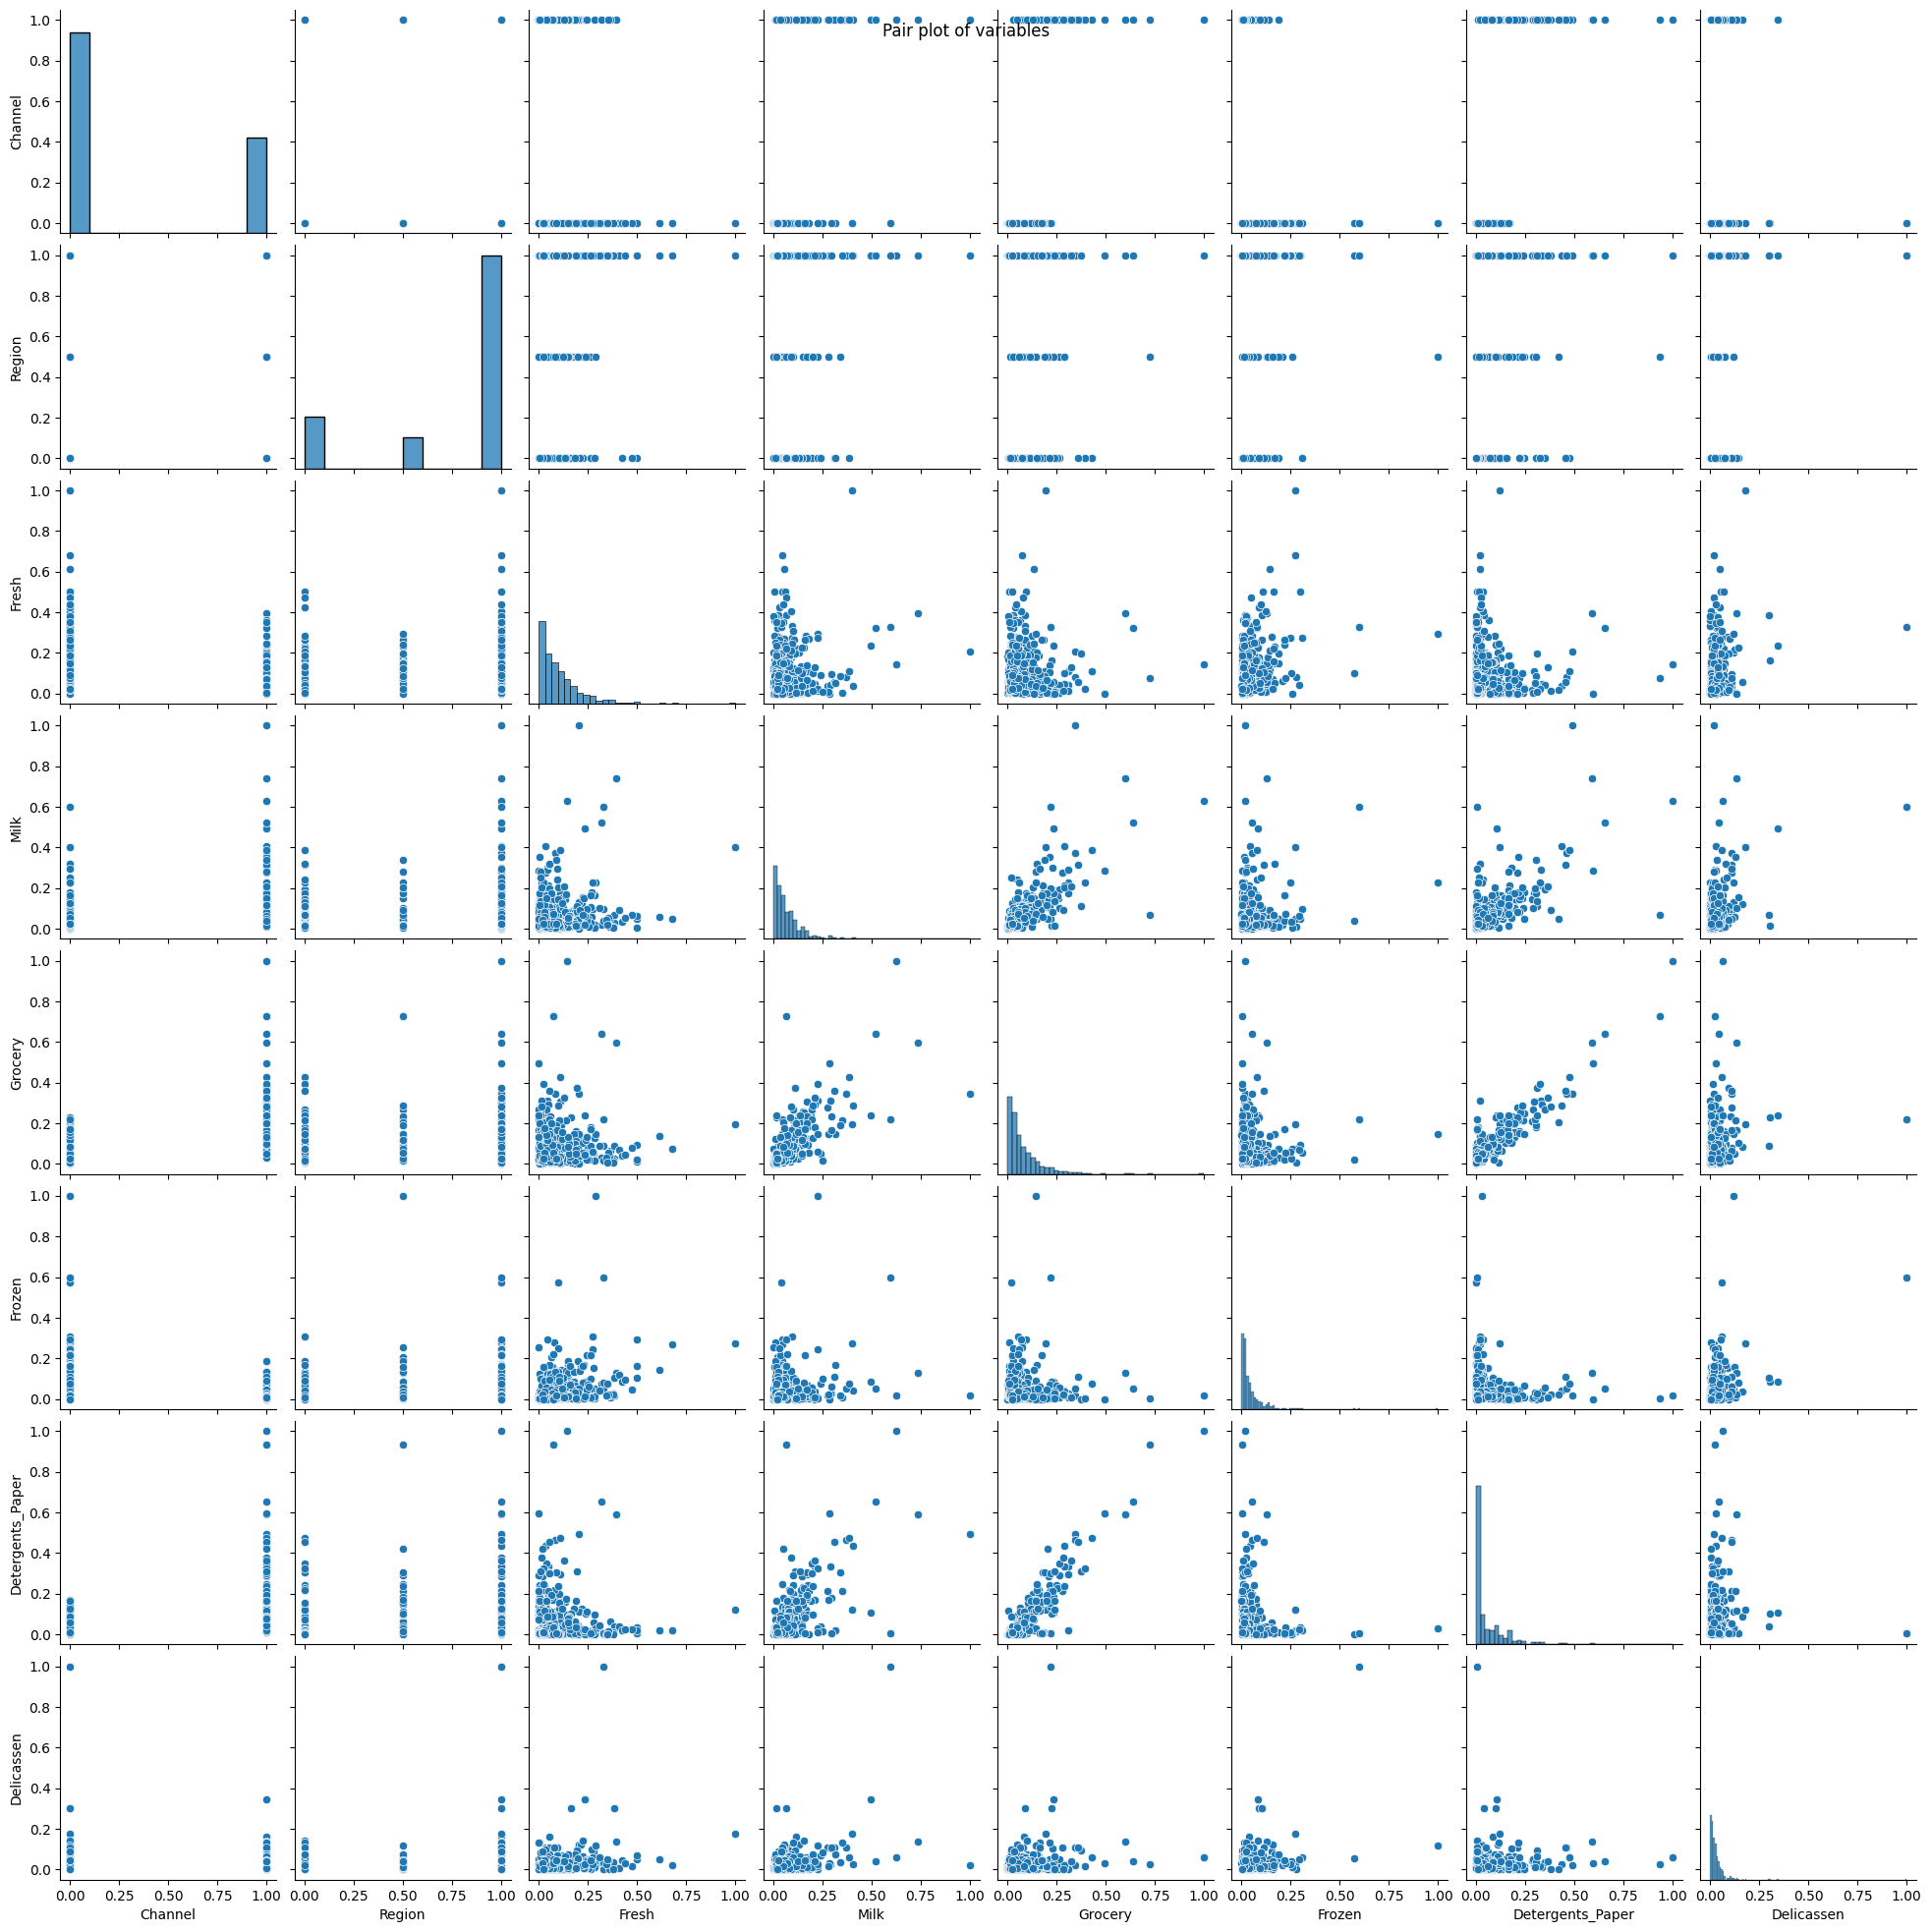

In [20]:
# Visualize the relationships between variables using a pair plot
sns.pairplot(wholesale_customers_scaled_df)
plt.suptitle("Pair plot of variables")
plt.show()

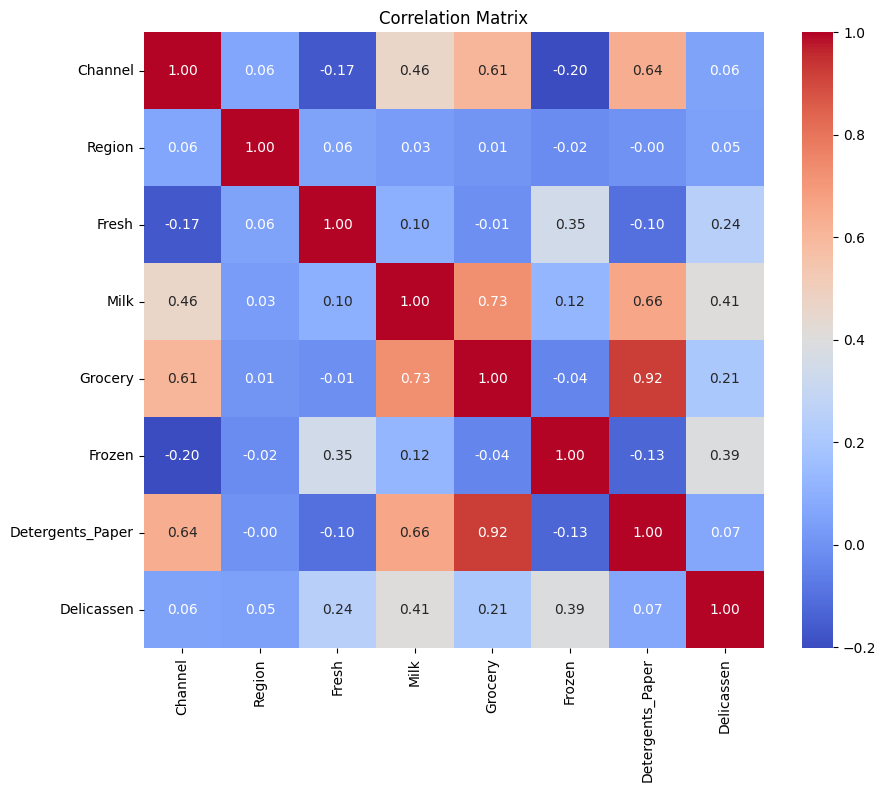

In [21]:
# Calculate correlation matrix
correlation_matrix = wholesale_customers_scaled_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 3. Customer Segmentation
- Apply clustering algorithms to segment customers based on their spending patterns:
  - Select appropriate clustering techniques (e.g., K-means, hierarchical clustering)
  - Determine the optimal number of clusters using evaluation metrics (e.g., silhouette score, elbow method)
- Visualize the clusters to understand the differences between customer segments

### KMeans

In [65]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [66]:
# Extracting relevant features (spending on different product categories)
X = wholesale_customers_df.iloc[:, 2:]  # Exclude 'Channel' and 'Region' columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

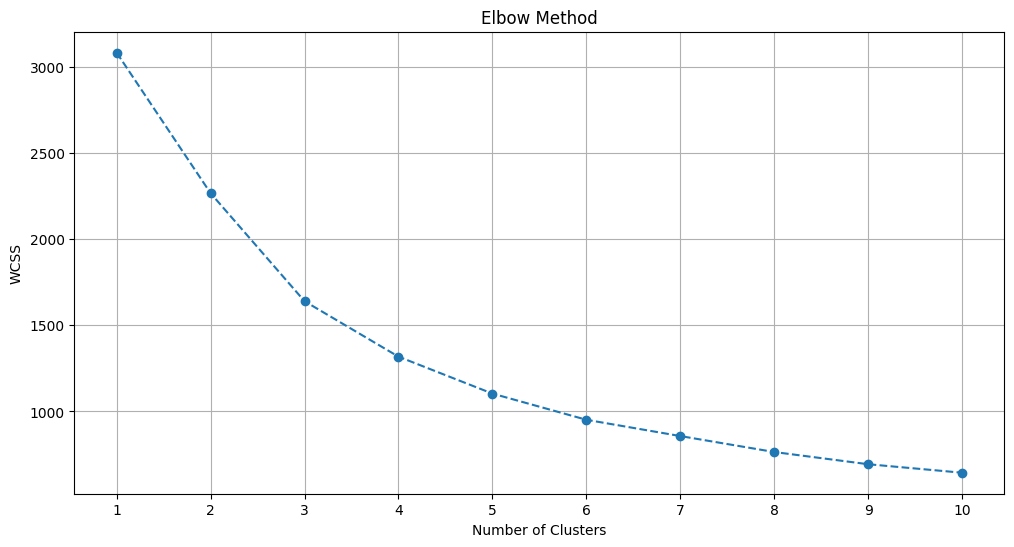

In [68]:
# Plotting the elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [69]:
# Fit K-means clustering model with optimal number of clusters
k = 4  # Assuming optimal number of clusters from elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [70]:
# Predict cluster labels
clusters = kmeans.predict(X_scaled)

In [71]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4808893628725193


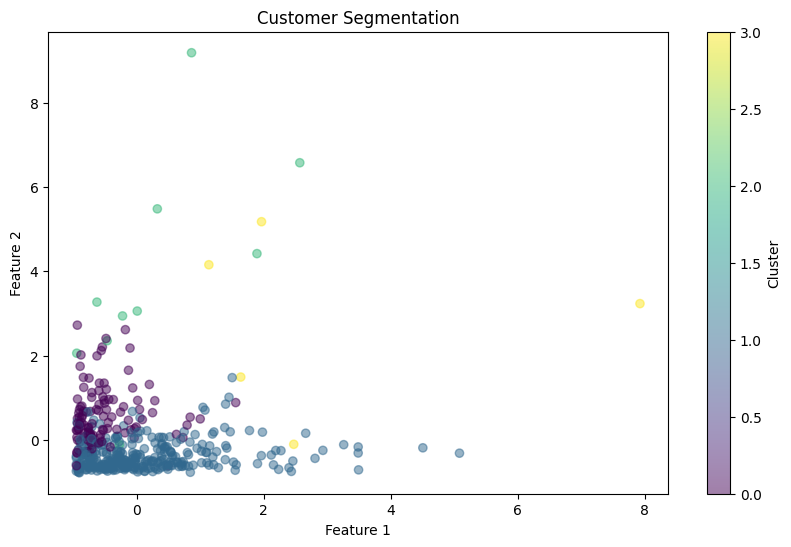

In [72]:
# Visualize clusters (assuming only two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Customer Segmentation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

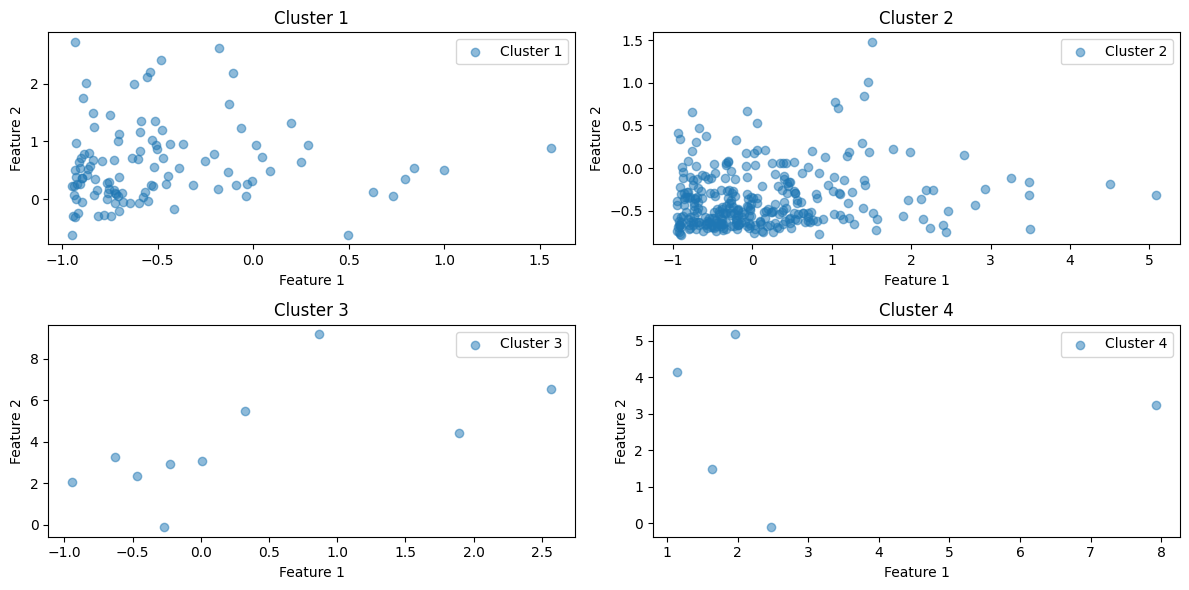

In [73]:
# Visualize clusters and spending patterns
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(range(k)):
    plt.subplot(2, 2, i+1)
    plt.scatter(X_scaled[clusters == cluster][:, 0], X_scaled[clusters == cluster][:, 1], label=f'Cluster {cluster+1}', alpha=0.5)
    plt.title(f'Cluster {cluster+1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
plt.tight_layout()
plt.show()

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.845455  2.554545   5591.436364  10113.027273  15637.390909   
1        1.120635  2.536508  13504.987302   3044.539683   3844.444444   
2        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3        1.200000  2.800000  50270.600000  26361.800000  16416.000000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         1499.918182       6711.354545   1759.090909  
1         3271.425397        852.320635   1127.107937  
2         3054.600000      24875.200000   2942.800000  
3        25122.800000       2475.000000  18595.200000  


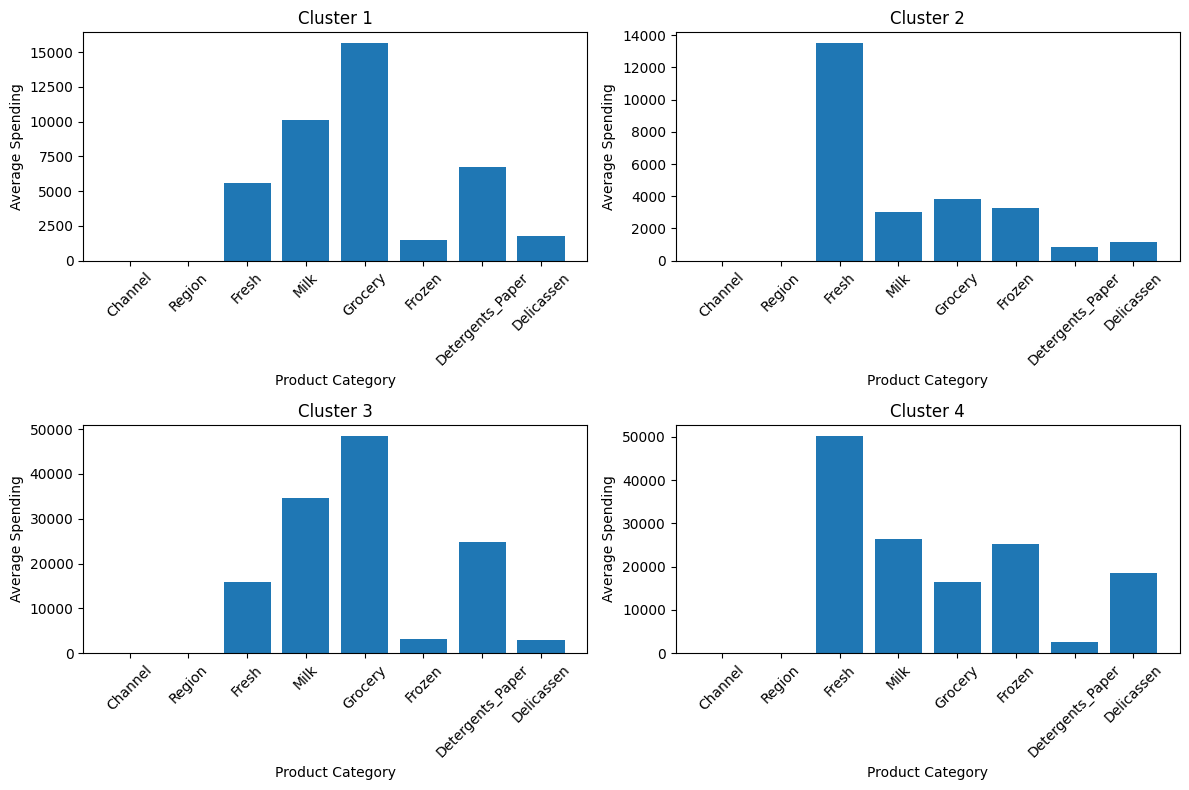

In [74]:
# Add cluster labels to the original dataset
wholesale_customers_df['Cluster'] = clusters

# Analyze the characteristics of each customer segment
segment_summary = wholesale_customers_df.groupby('Cluster').mean()

# Print the summary statistics for each cluster
print(segment_summary)

# Visualize the spending patterns of each cluster
# Visualize the spending patterns of each cluster
plt.figure(figsize=(12, 8))
for i in range(k):
    plt.subplot(2, 2, i+1)
    plt.bar(segment_summary.columns, segment_summary.iloc[i])
    plt.title(f'Cluster {i+1}')
    plt.xlabel('Product Category')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
# Print and interpret the characteristics of each customer segment
for i, cluster_summary in enumerate(segment_summary.iterrows()):
    print(f"\nCluster {i+1} Summary:")
    print(cluster_summary[1])


Cluster 1 Summary:
Channel                 1.845455
Region                  2.554545
Fresh                5591.436364
Milk                10113.027273
Grocery             15637.390909
Frozen               1499.918182
Detergents_Paper     6711.354545
Delicassen           1759.090909
Name: 0, dtype: float64

Cluster 2 Summary:
Channel                 1.120635
Region                  2.536508
Fresh               13504.987302
Milk                 3044.539683
Grocery              3844.444444
Frozen               3271.425397
Detergents_Paper      852.320635
Delicassen           1127.107937
Name: 1, dtype: float64

Cluster 3 Summary:
Channel                 2.0
Region                  2.5
Fresh               15964.9
Milk                34708.5
Grocery             48536.9
Frozen               3054.6
Detergents_Paper    24875.2
Delicassen           2942.8
Name: 2, dtype: float64

Cluster 4 Summary:
Channel                 1.2
Region                  2.8
Fresh               50270.6
Milk        

In [76]:
# Interpretation
print("\nInterpretation:")
print("- Cluster 1: Moderate spending across all product categories.")
print("- Cluster 2: High spending on 'Fresh' products and lower spending on other categories.")
print("- Cluster 3: High spending on 'Milk', 'Grocery', and 'Detergents_Paper', indicating retailers or supermarkets.")
print("- Cluster 4: Very high spending on 'Fresh' and 'Frozen' products, suggesting restaurants or cafes.")

# Define personalized strategies for each cluster
personalized_strategies = {
    0: "Target marketing messages highlighting a wide variety of products to appeal to diverse preferences.",
    1: "Promote 'Fresh' products and create marketing campaigns focusing on health and freshness.",
    2: "Offer discounts on bulk purchases for 'Milk', 'Grocery', and 'Detergents_Paper' products.",
    3: "Provide special offers on 'Fresh' and 'Frozen' products to attract restaurant and cafe owners."
}

# Print personalized strategies for each cluster
print("\nPersonalized Marketing Strategies:")
for i, strategy in personalized_strategies.items():
    print(f"\nCluster {i+1}: {strategy}")



Interpretation:
- Cluster 1: Moderate spending across all product categories.
- Cluster 2: High spending on 'Fresh' products and lower spending on other categories.
- Cluster 3: High spending on 'Milk', 'Grocery', and 'Detergents_Paper', indicating retailers or supermarkets.
- Cluster 4: Very high spending on 'Fresh' and 'Frozen' products, suggesting restaurants or cafes.

Personalized Marketing Strategies:

Cluster 1: Target marketing messages highlighting a wide variety of products to appeal to diverse preferences.

Cluster 2: Promote 'Fresh' products and create marketing campaigns focusing on health and freshness.

Cluster 3: Offer discounts on bulk purchases for 'Milk', 'Grocery', and 'Detergents_Paper' products.

Cluster 4: Provide special offers on 'Fresh' and 'Frozen' products to attract restaurant and cafe owners.


### hierarchical clustering

In [77]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [78]:
# Extracting relevant features (spending on different product categories)
X = wholesale_customers_df.iloc[:, 2:]  # Exclude 'Channel' and 'Region' columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Apply hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)


C:\Users\admin\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.120635  2.536508  13504.987302   3044.539683   3844.444444   
1        1.200000  2.800000  50270.600000  26361.800000  16416.000000   
2        1.845455  2.554545   5591.436364  10113.027273  15637.390909   
3        2.000000  2.500000  15964.900000  34708.500000  48536.900000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         3271.425397        852.320635   1127.107937  
1        25122.800000       2475.000000  18595.200000  
2         1499.918182       6711.354545   1759.090909  
3         3054.600000      24875.200000   2942.800000  


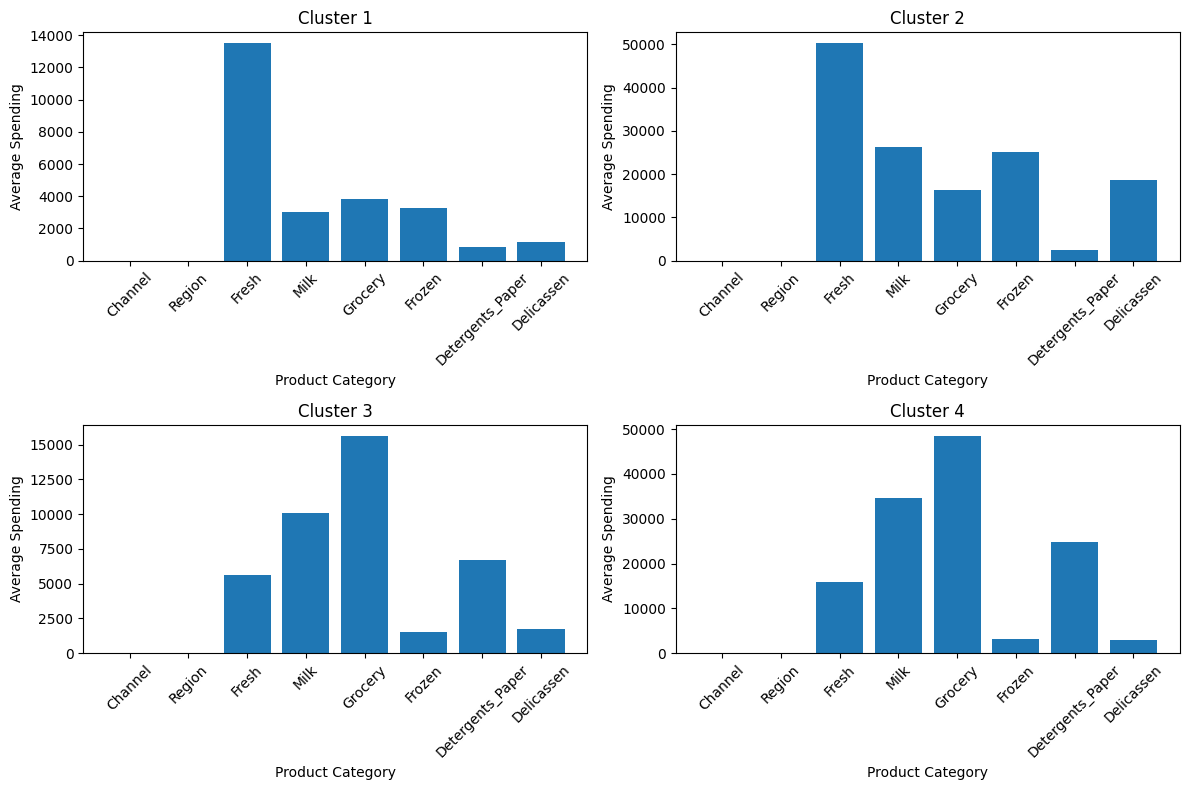

In [84]:
# Add cluster labels to the original dataset
wholesale_customers_df['Cluster'] = clusters

# Analyze the characteristics of each customer segment
segment_summary = wholesale_customers_df.groupby('Cluster').mean()

# Print the summary statistics for each cluster
print(segment_summary)

# Visualize the spending patterns of each cluster
plt.figure(figsize=(12, 8))
for i in range(k):
    plt.subplot(2, 2, i+1)
    plt.bar(segment_summary.columns, segment_summary.iloc[i])
    plt.title(f'Cluster {i+1}')
    plt.xlabel('Product Category')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [85]:

# Print and interpret the characteristics of each customer segment
for i, cluster_summary in enumerate(segment_summary.iterrows()):
    print(f"\nCluster {i+1} Summary:")
    print(cluster_summary[1])

# Define personalized strategies for each cluster
personalized_strategies = {
    0: "Target marketing messages highlighting a wide variety of products to appeal to diverse preferences.",
    1: "Promote 'Fresh' products and create marketing campaigns focusing on health and freshness.",
    2: "Offer discounts on bulk purchases for 'Milk', 'Grocery', and 'Detergents_Paper' products.",
    3: "Provide special offers on 'Fresh' and 'Frozen' products to attract restaurant and cafe owners."
}

# Print personalized strategies for each cluster
print("\nPersonalized Marketing Strategies:")
for i, strategy in personalized_strategies.items():
    print(f"\nCluster {i+1}: {strategy}")


Cluster 1 Summary:
Channel                 1.120635
Region                  2.536508
Fresh               13504.987302
Milk                 3044.539683
Grocery              3844.444444
Frozen               3271.425397
Detergents_Paper      852.320635
Delicassen           1127.107937
Name: 0, dtype: float64

Cluster 2 Summary:
Channel                 1.2
Region                  2.8
Fresh               50270.6
Milk                26361.8
Grocery             16416.0
Frozen              25122.8
Detergents_Paper     2475.0
Delicassen          18595.2
Name: 1, dtype: float64

Cluster 3 Summary:
Channel                 1.845455
Region                  2.554545
Fresh                5591.436364
Milk                10113.027273
Grocery             15637.390909
Frozen               1499.918182
Detergents_Paper     6711.354545
Delicassen           1759.090909
Name: 2, dtype: float64

Cluster 4 Summary:
Channel                 2.0
Region                  2.5
Fresh               15964.9
Milk        

## 4. Customer Profiling
- Analyze the characteristics of each customer segment:
  - Examine the average spending on different product categories for each segment
  - Identify the types of businesses or customer profiles represented in each segment
- Gain insights into the needs, preferences, and behaviors of different customer segments

In [87]:
wholesale_customers_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0


In [88]:
# Analyze characteristics of each customer segment
segment_characteristics = wholesale_customers_df.groupby('Cluster').mean()

# Display average spending on different product categories for each segment
print("\nAverage spending on different product categories for each segment:")
print(segment_characteristics)


Average spending on different product categories for each segment:
          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.120635  2.536508  13504.987302   3044.539683   3844.444444   
1        1.200000  2.800000  50270.600000  26361.800000  16416.000000   
2        1.845455  2.554545   5591.436364  10113.027273  15637.390909   
3        2.000000  2.500000  15964.900000  34708.500000  48536.900000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         3271.425397        852.320635   1127.107937  
1        25122.800000       2475.000000  18595.200000  
2         1499.918182       6711.354545   1759.090909  
3         3054.600000      24875.200000   2942.800000  


In [91]:
# Identify customer profiles represented in each cluster
cluster_profiles = wholesale_customers_df['Cluster'].value_counts()
# Display the types of businesses or customer profiles represented in each cluster
print("\nTypes of businesses or customer profiles represented in each cluster:")
print(cluster_profiles)


Types of businesses or customer profiles represented in each cluster:
Cluster
0    315
2    110
3     10
1      5
Name: count, dtype: int64



Segment 0:
Highest spending category: Fresh (Average spending: $13504.99)

Segment 1:
Highest spending category: Fresh (Average spending: $50270.60)

Segment 2:
Highest spending category: Grocery (Average spending: $15637.39)

Segment 3:
Highest spending category: Grocery (Average spending: $48536.90)


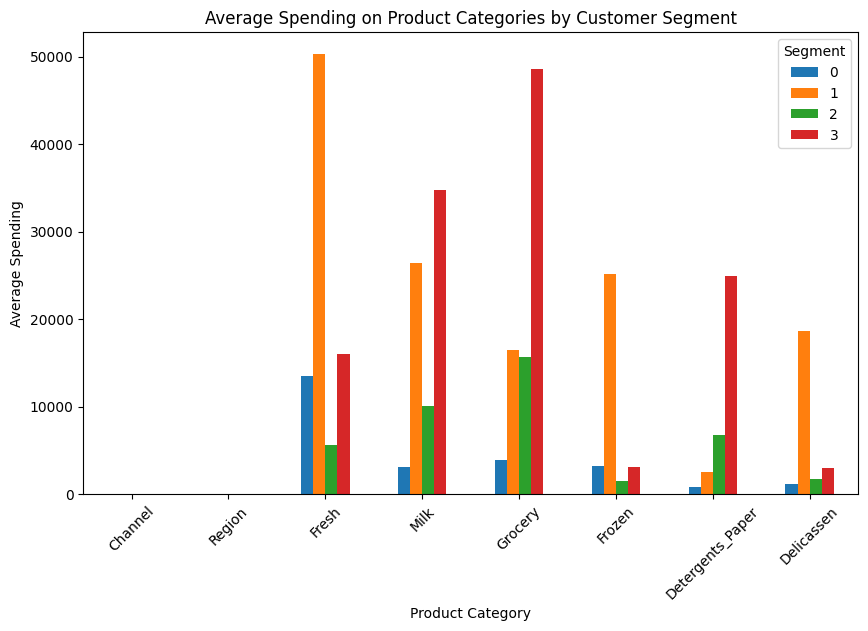


Summary of key findings:
- Identify the product categories with the highest spending for each segment.
- Compare spending patterns across segments to identify trends and differences.
- Identify common characteristics or trends within each segment.
- Identify potential areas for personalized marketing strategies or product recommendations.


In [92]:
# Further analyze and interpret the results
# You can add more detailed analysis based on your specific project objectives and dataset

# Example: Identify the product categories with the highest spending for each segment
for segment in segment_characteristics.index:
    highest_spending_category = segment_characteristics.loc[segment].idxmax()
    highest_spending_amount = segment_characteristics.loc[segment].max()
    print(f"\nSegment {segment}:")
    print(f"Highest spending category: {highest_spending_category} (Average spending: ${highest_spending_amount:.2f})")

# Example: Compare spending patterns across segments
# You can visualize spending patterns using bar plots or other visualization techniques

import matplotlib.pyplot as plt

# Plot average spending on different product categories for each segment
segment_characteristics.T.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending on Product Categories by Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

# Example: Identify common characteristics or trends within each segment
# You can analyze additional variables or perform statistical tests to identify significant differences between segments

# Example: Identify potential areas for personalized marketing strategies or product recommendations
# Based on the analysis, identify product categories or customer profiles with growth potential or untapped opportunities for personalized marketing efforts

# Example: Summarize key findings and insights from the customer profiling analysis
print("\nSummary of key findings:")
print("- Identify the product categories with the highest spending for each segment.")
print("- Compare spending patterns across segments to identify trends and differences.")
print("- Identify common characteristics or trends within each segment.")
print("- Identify potential areas for personalized marketing strategies or product recommendations.")

# Update the conclusion section of your project docume



## 5. Personalization Strategies
- Develop personalized marketing strategies and product recommendations based on the segmentation results:
  - Tailor marketing messages and promotions to each customer segment's preferences and needs
  - Implement recommendation systems to suggest products or services that are likely to be of interest to each segment
- Discuss potential approaches for implementing and integrating personalization strategies into the business operations

In [101]:
# Implement personalized product recommendations for all clusters
def get_recommendations_for_all_clusters(num_clusters=5, num_recommendations=5):
    recommendations = {}
    for cluster_id in range(num_clusters):
        cluster_data = wholesale_customers_df[wholesale_customers_df['Cluster'] == cluster_id]
        if len(cluster_data) > 0:
            top_products = cluster_data.drop(columns=['Channel', 'Region', 'Cluster']).mean().sort_values(ascending=False).head(num_recommendations).index.tolist()
            recommendations[cluster_id] = top_products
    return recommendations

# Get personalized recommendations for all clusters
cluster_recommendations = get_recommendations_for_all_clusters()

# Print personalized recommendations for each cluster
for cluster_id, cluster_products in cluster_recommendations.items():
    print(f"Personalized recommendations for Cluster {cluster_id}:")
    for product in cluster_products:
        print("- ", product)
    print()


Personalized recommendations for Cluster 0:
-  Fresh
-  Grocery
-  Frozen
-  Milk
-  Delicassen

Personalized recommendations for Cluster 1:
-  Fresh
-  Milk
-  Frozen
-  Delicassen
-  Grocery

Personalized recommendations for Cluster 2:
-  Grocery
-  Milk
-  Detergents_Paper
-  Fresh
-  Delicassen

Personalized recommendations for Cluster 3:
-  Grocery
-  Milk
-  Detergents_Paper
-  Fresh
-  Frozen



### Personalized recommendations for Clusters
- **Cluster 0 Recommendations:**
Customers in Cluster 0 tend to spend more on Fresh, Grocery, Frozen, Milk, and Delicassen products. These are the top recommended product categories for this cluster, indicating that customers in this segment are likely interested in these types of items.

- **Cluster 1 Recommendations:**
Customers in Cluster 1 have a preference for Fresh, Milk, Frozen, and Delicassen products. These are the top recommended product categories for this cluster, suggesting that customers in this segment are more likely to purchase these types of items.

- **Cluster 2 Recommendations:**
Customers in Cluster 2 show a higher spending on Grocery, Milk, Detergents_Paper, Fresh, and Delicassen products. These are the top recommended product categories for this cluster, indicating that customers in this segment are interested in these types of items.

- **Cluster 3 Recommendations:**
Customers in Cluster 3 have a preference for Grocery, Milk, Detergents_Paper, Fresh, and Frozen products. These are the top recommended product categories for this cluster, suggesting that customers in this segment are more likely to purchase these types of items.